In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [3]:
#Paths

SP_500_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\S&P 500 Index.csv")
ARKK_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\ARKK.csv")

#Joe's Path
baba_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\BABA.csv")
pton_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\PTON.csv")
gm_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\GM.csv")
taco_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\TACO.csv")
auy_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\AUY.csv")

#Larry's Path
aa_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\AA.csv")
nio_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\NIO.csv")
pfe_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\PFE.csv")
xom_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\XOM.csv")
znga_path = Path("C:\\Users\\paulg\\Desktop\\STD and Sharpe Risk Analysis\\ZNGA.csv")

# Read in data for S&P 500 Index and ARKK
sp_500_portfolio = pd.read_csv(SP_500_path, parse_dates=True, infer_datetime_format=True)
arkk_portfolio = pd.read_csv(ARKK_path, parse_dates=True, infer_datetime_format=True)

#Read in Joe's Top 5 data
joe_top5_baba_portfolio = pd.read_csv(baba_path, parse_dates=True, infer_datetime_format=True)
joe_top5_pton_portfolio = pd.read_csv(pton_path, parse_dates=True, infer_datetime_format=True)
joe_top5_gm_portfolio = pd.read_csv(gm_path, parse_dates=True, infer_datetime_format=True)
joe_top5_taco_portfolio = pd.read_csv(taco_path, parse_dates=True, infer_datetime_format=True)
joe_top5_auy_portfolio = pd.read_csv(auy_path, parse_dates=True, infer_datetime_format=True)

#Read Larry's Top 5 data
larry_top5_aa_portfolio = pd.read_csv(aa_path, parse_dates=True, infer_datetime_format=True)
larry_top5_nio_portfolio = pd.read_csv(nio_path, parse_dates=True, infer_datetime_format=True)
lary_top5_pfe_portfolio = pd.read_csv(pfe_path, parse_dates=True, infer_datetime_format=True)
larry_top5_xom_portfolio = pd.read_csv(xom_path, parse_dates=True, infer_datetime_format=True)
larry_top5_znga_portfolio = pd.read_csv(znga_path, parse_dates=True, infer_datetime_format=True)

# Rename Columns
sp_500_portfolio = sp_500_portfolio.rename(columns={"Close":"SP500"})
arkk_portfolio = arkk_portfolio.rename(columns={"Close":"ARKK"})

# Drop na
sp_500_portfolio = sp_500_portfolio.dropna()
arkk_portfolio = arkk_portfolio.dropna()

# Set Date as index
sp_500_portfolio = sp_500_portfolio.set_index('Date')
arkk_portfolio = arkk_portfolio.set_index('Date')

In [4]:
joe_top5_baba_portfolio = joe_top5_baba_portfolio.rename(columns={"Close":"BABA"})
joe_top5_baba_portfolio.head()

,Date,BABA
0,5/24/2018 16:00:00,197.37
1,5/25/2018 16:00:00,199.20
2,5/29/2018 16:00:00,198.00
3,5/30/2018 16:00:00,197.98
4,5/31/2018 16:00:00,198.01


In [5]:
joe_top5_pton_portfolio = joe_top5_pton_portfolio.rename(columns={"Close":"PTON"})
joe_top5_pton_portfolio.head()

,Date,PTON
0,9/26/2019 16:00:00,25.76
1,9/27/2019 16:00:00,25.24
2,9/30/2019 16:00:00,25.10
3,10/1/2019 16:00:00,22.51
4,10/2/2019 16:00:00,22.60


In [6]:
joe_top5_gm_portfolio = joe_top5_gm_portfolio.rename(columns={"Close":"GM"})
joe_top5_gm_portfolio.head()

,Date,GM
0,5/24/2018 16:00:00,38.39
1,5/25/2018 16:00:00,38.30
2,5/29/2018 16:00:00,37.38
3,5/30/2018 16:00:00,37.83
4,5/31/2018 16:00:00,42.70


In [7]:
joe_top5_taco_portfolio = joe_top5_taco_portfolio.rename(columns={"Close":"TACO"})
joe_top5_taco_portfolio.head()

,Date,TACO
0,5/24/2018 16:00:00,11.56
1,5/25/2018 16:00:00,12.06
2,5/29/2018 16:00:00,11.90
3,5/30/2018 16:00:00,12.21
4,5/31/2018 16:00:00,12.21


In [8]:
joe_top5_auy_portfolio = joe_top5_auy_portfolio.rename(columns={"Close":"AUY"})
joe_top5_auy_portfolio.head()

,Date,AUY
0,5/24/2018 16:00:00,2.90
1,5/25/2018 16:00:00,2.87
2,5/29/2018 16:00:00,2.87
3,5/30/2018 16:00:00,2.91
4,5/31/2018 16:00:00,2.91


In [9]:
#Concat Joe's Top 5 into a Data
joe_top5 = pd.concat([joe_top5_baba_portfolio,joe_top5_pton_portfolio,joe_top5_gm_portfolio,joe_top5_taco_portfolio,joe_top5_auy_portfolio], axis='columns', join='inner')
joe_top5 = joe_top5.dropna()
joe_top5 = joe_top5.set_index('Date')
joe_top5.head()

,BABA,PTON,GM,TACO,AUY
Date,,,,,
"(5/24/2018 16:00:00, 9/26/2019 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",197.37,25.76,38.39,11.56,2.90
"(5/25/2018 16:00:00, 9/27/2019 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",199.20,25.24,38.30,12.06,2.87
"(5/29/2018 16:00:00, 9/30/2019 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",198.00,25.10,37.38,11.90,2.87
"(5/30/2018 16:00:00, 10/1/2019 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",197.98,22.51,37.83,12.21,2.91
"(5/31/2018 16:00:00, 10/2/2019 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",198.01,22.60,42.70,12.21,2.91


In [10]:
larry_top5_aa_portfolio = larry_top5_aa_portfolio.rename(columns={"Close":"AA"})
larry_top5_aa_portfolio.head()

,Date,AA
0,5/24/2018 16:00:00,49.15
1,5/25/2018 16:00:00,47.93
2,5/29/2018 16:00:00,47.30
3,5/30/2018 16:00:00,48.54
4,5/31/2018 16:00:00,48.07


In [11]:
larry_top5_nio_portfolio = larry_top5_nio_portfolio.rename(columns={"Close":"NIO"})
larry_top5_nio_portfolio.head()

,Date,NIO
0,9/12/2018 16:00:00,6.60
1,9/13/2018 16:00:00,11.60
2,9/14/2018 16:00:00,9.90
3,9/17/2018 16:00:00,8.50
4,9/18/2018 16:00:00,7.68


In [12]:
lary_top5_pfe_portfolio = lary_top5_pfe_portfolio.rename(columns={"Close":"PFE"})
lary_top5_pfe_portfolio.head()

,Date,PFE
0,5/24/2018 16:00:00,34.00
1,5/25/2018 16:00:00,33.80
2,5/29/2018 16:00:00,33.82
3,5/30/2018 16:00:00,34.15
4,5/31/2018 16:00:00,34.15


In [13]:
larry_top5_xom_portfolio = larry_top5_xom_portfolio.rename(columns={"Close":"XOM"})
larry_top5_xom_portfolio.head()

,Date,XOM
0,5/24/2018 16:00:00,80.27
1,5/25/2018 16:00:00,78.71
2,5/29/2018 16:00:00,78.42
3,5/30/2018 16:00:00,81.50
4,5/31/2018 16:00:00,81.24


In [14]:
larry_top5_znga_portfolio = larry_top5_znga_portfolio.rename(columns={"Close":"ZNGA"})
larry_top5_znga_portfolio.head()

,Date,ZNGA
0,5/24/2018 16:00:00,4.14
1,5/25/2018 16:00:00,4.17
2,5/29/2018 16:00:00,4.18
3,5/30/2018 16:00:00,4.32
4,5/31/2018 16:00:00,4.40


In [15]:
#Concat Larry's Top 5 into a Data
larry_top5 = pd.concat([larry_top5_aa_portfolio,larry_top5_nio_portfolio,lary_top5_pfe_portfolio,larry_top5_xom_portfolio,larry_top5_znga_portfolio], axis='columns', join='inner')
larry_top5 = larry_top5.dropna()
larry_top5 = larry_top5.set_index('Date')
larry_top5.head()

,AA,NIO,PFE,XOM,ZNGA
Date,,,,,
"(5/24/2018 16:00:00, 9/12/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",49.15,6.60,34.00,80.27,4.14
"(5/25/2018 16:00:00, 9/13/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",47.93,11.60,33.80,78.71,4.17
"(5/29/2018 16:00:00, 9/14/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",47.30,9.90,33.82,78.42,4.18
"(5/30/2018 16:00:00, 9/17/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",48.54,8.50,34.15,81.50,4.32
"(5/31/2018 16:00:00, 9/18/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",48.07,7.68,34.15,81.24,4.40


### Calculate daily returns 

In [16]:
# Calculate daily returns for S&P 500 Index
sp_500_returns = sp_500_portfolio.pct_change()
sp_500_returns.head()

,SP500
Date,
5/28/2018 16:00:00,NaN
5/30/2018 16:00:00,-0.020833
5/31/2018 16:00:00,0.021277
6/1/2018 16:00:00,0.041667
6/5/2018 16:00:00,-0.040000


In [17]:
# Calculate daily returns for ARKK EFT
arkk_returns = arkk_portfolio.pct_change()
arkk_returns.head()

,ARKK
Date,
5/24/2018 16:00:00,NaN
5/25/2018 16:00:00,-0.001387
5/29/2018 16:00:00,-0.002778
5/30/2018 16:00:00,0.013931
5/31/2018 16:00:00,-0.004351


In [18]:
joe_top5_returns = joe_top5.pct_change()
joe_top5_returns.head()

,BABA,PTON,GM,TACO,AUY
Date,,,,,
"(5/24/2018 16:00:00, 9/26/2019 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",NaN,NaN,NaN,NaN,NaN
"(5/25/2018 16:00:00, 9/27/2019 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",0.009272,-0.020186,-0.002344,0.043253,-0.010345
"(5/29/2018 16:00:00, 9/30/2019 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",-0.006024,-0.005547,-0.024021,-0.013267,0.000000
"(5/30/2018 16:00:00, 10/1/2019 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",-0.000101,-0.103187,0.012039,0.026050,0.013937
"(5/31/2018 16:00:00, 10/2/2019 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",0.000152,0.003998,0.128734,0.000000,0.000000


In [19]:
larry_top5_returns= larry_top5.pct_change()
larry_top5_returns.head()

,AA,NIO,PFE,XOM,ZNGA
Date,,,,,
"(5/24/2018 16:00:00, 9/12/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",NaN,NaN,NaN,NaN,NaN
"(5/25/2018 16:00:00, 9/13/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",-0.024822,0.757576,-0.005882,-0.019434,0.007246
"(5/29/2018 16:00:00, 9/14/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",-0.013144,-0.146552,0.000592,-0.003684,0.002398
"(5/30/2018 16:00:00, 9/17/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",0.026216,-0.141414,0.009758,0.039276,0.033493
"(5/31/2018 16:00:00, 9/18/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",-0.009683,-0.096471,0.000000,-0.003190,0.018519


### `Concat` portfolios into one DataFrame

In [20]:
# Concat returns DataFrames
all_returns = pd.concat([sp_500_returns.reset_index(drop=True), arkk_returns.reset_index(drop=True), joe_top5_returns.reset_index(drop=True), larry_top5_returns.reset_index(drop=True)], axis='columns', join='inner')
all_returns.head()

,SP500,ARKK,BABA,PTON,GM,TACO,AUY,AA,NIO,PFE,XOM,ZNGA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.020833,-0.001387,0.009272,-0.020186,-0.002344,0.043253,-0.010345,-0.024822,0.757576,-0.005882,-0.019434,0.007246
2,0.021277,-0.002778,-0.006024,-0.005547,-0.024021,-0.013267,0.000000,-0.013144,-0.146552,0.000592,-0.003684,0.002398
3,0.041667,0.013931,-0.000101,-0.103187,0.012039,0.026050,0.013937,0.026216,-0.141414,0.009758,0.039276,0.033493
4,-0.040000,-0.004351,0.000152,0.003998,0.128734,0.000000,0.000000,-0.009683,-0.096471,0.000000,-0.003190,0.018519


### Calculate `std dev` for all data

In [21]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std

SP500    0.062582
ARKK     0.017960
BABA     0.020560
PTON     0.046128
GM       0.017979
TACO     0.021045
AUY      0.028110
AA       0.027074
NIO      0.073374
PFE      0.011852
XOM      0.012242
ZNGA     0.018422
dtype: float64

In [ ]:
#Normalize 


### Calculate `sharpe ratio` for all data

In [51]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

SP500    0.717238
ARKK     0.598170
BABA     0.383375
PTON     1.497716
GM      -0.056082
dtype: float64

### Plot Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

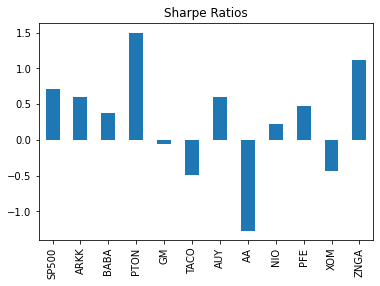

In [52]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')